In [4]:
import numpy

def myinterpolate(X):
    for i in range(1,len(X)-1):
        if(numpy.isnan(X[i]) or X[i] <-40):
            if(numpy.isnan(X[i+1])):
                X[i]=X[i-1]
            else:
                X[i] = (X[i-1] + X[i+1])/2.0
                    

In [5]:
#my correlation 

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pylab

# compute the correlation of sets A and B by hand
# assumes you are not passing any bogus values
# there are canned routines to do this,
# in python called numpy.cov(a,b)
# our version will also return Pearson's R value

def mycorrelation(A,B):

    # you need to take out some basic trends
    # the mean of A and B are not the same
    # calculate the mean

    meanA = np.mean(A)
    meanB = np.mean(B)
    print('mean',meanA, meanB)

    residualA = A-meanA# add code
    residualB = B-meanB# add code
    hr = np.arange(0,A.size,1)
    # you may also have a secular trend,
    # which could be linear or rise and fall with the year
    # and you could write code to take that out
    # a simple linear function or one motivated by physics

    # lets not *do* that today.  But see later when it comes up.
    # instead, pick short time scales.

    plt.plot(hr,residualA)
    plt.plot(hr,residualB)
    plt.xlabel('Hours passed')
    plt.ylabel('Residuals')
    
    
    # the covariance definition is on the board.
    # the properties term by term and the sum are important
    # sketch on paper what makes the sum small or large
    # then implement it in one line

    mycovariance =sum(residualA*residualB) # add code

    # make the average by dividing by number of elements

    mycovariance = mycovariance / A.size

    # what a lot of people use is Pearson's R test
    # which is defined as covariance(A,B)/std(A)std(B)
    # implement this in one to three lines.

    R = mycovariance / (np.std(A)*np.std(B)) # add code
    print ('R = ', R)
    # there is a slight oddity to this, when the rest is working, correct it.

    # this R value leads to a hypothesis test
    # the P-value to reject the Null hypothesis (which is what...?)

    # unhide this code when you are ready for it
    # you wont be surprised that we can perform
    # a P-value for the Null hypothesis (which is what?)
    # even if we are not interested in that hypothesis today.
    # The statistic that relates R to a pdf is not Gaussian
    # it is Students T distribution.
    # the specific form to get Students T from Pearsons R is

    dof = A.size - 2.0
    T = R * np.sqrt( dof / (1.0 - R * R) )

    # once you have it for this situation, you can query the cdf for the P-value
    nullP = 1.0 - scipy.stats.t.cdf(T, dof)

    # print it.  might need to format in scientific notation to see it.
    print('T, nullP', T, nullP)

    return R

plt.show()

mean -6.347916666666666 -7.67923611111111
R =  0.8787065939026939
T, nullP 49.323970775963744 0.0


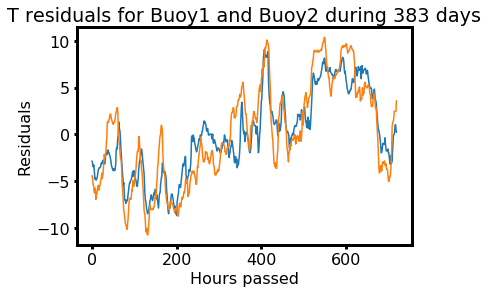

In [60]:
# first year 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8500
rangehigh = rangelow + 720

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy1 and Buoy2 during 383 days')
plt.xlabel("hour since beginning of record")
plt.ylabel("temperature (C)")

mymonth1 = g1[rangelow:rangehigh]
mymonth2 = g2[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()



mean -6.3528 -7.697933333333333
R =  0.8786744045733352
T, nullP 50.335779648137404 0.0


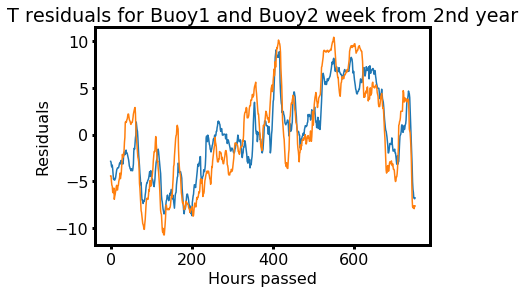

In [61]:
# second year

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8500
rangehigh = rangelow + 750

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy1 and Buoy2 week from 2nd year')
mymonth1 = g1[rangelow:rangehigh]
mymonth2 = g2[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()



mean -3.1550595238095243 -4.125595238095237
R =  0.936728008353761
T, nullP 34.476842169250475 0.0


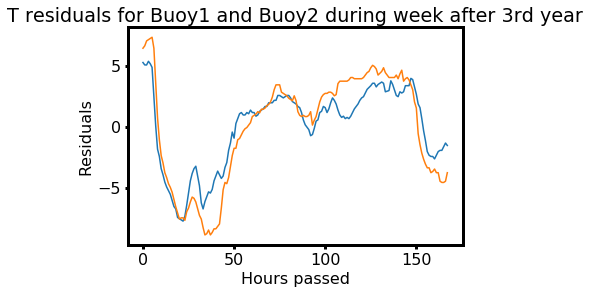

In [76]:
# third year

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 26298
rangehigh = rangelow + 168

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy1 and Buoy2 during week after 3rd year')

mymonth1 = g1[rangelow:rangehigh]
mymonth2 = g2[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()


mean 5.324162959160392 4.3433264887063645
R =  0.9634995451438672
T, nullP 673.9152993407525 0.0


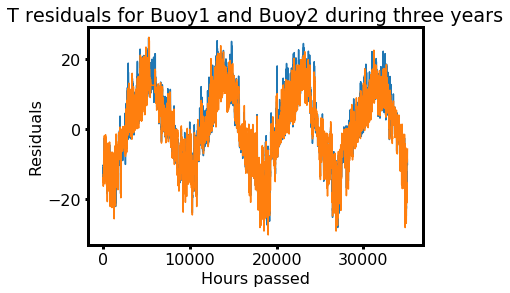

In [64]:
# three years together 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8766
rangehigh = rangelow + 35064

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy1 and Buoy2 during three years')

mymonth1 = g1[rangelow:rangehigh]
mymonth2 = g2[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()

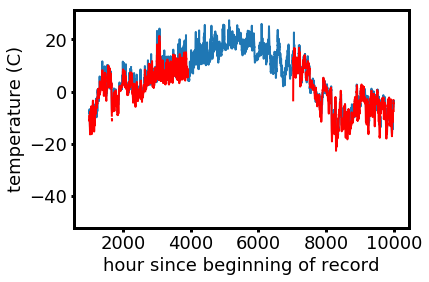

In [79]:
#first look airtemp

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy.stats
from scipy.stats import norm
from scipy.stats import expon
from scipy.optimize import curve_fit
#from interpolate import myinterpolate

pylab.rc('font', family='sans', size = 18)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

# myinterpolate(g2)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 1000
rangehigh = 10000

# Geez, son of gosh, plot this already
plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.xlabel("hour since beginning of record")
plt.ylabel("temperature (C)")

plt.show()



mean 5.324162959160392 4.3433264887063645
R =  0.9634995451438672
T, nullP 673.9152993407525 0.0


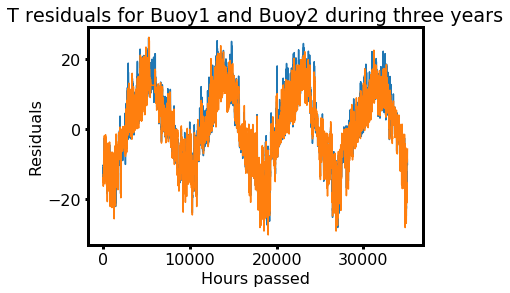

In [73]:
# three years together with 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8766
rangehigh = rangelow + 35064

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy1 and Buoy2 during three years')

mymonth1 = g1[rangelow:rangehigh]
mymonth2 = g2[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()

mean -4.557152777777778 -5.367499999999999
R =  0.7841356317459689
T, nullP 33.85704081686927 0.0


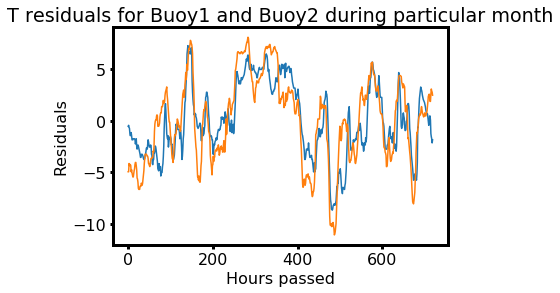

In [86]:
# month withitself 

# three years together with 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8766
rangehigh = rangelow + 720

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy1 and Buoy2 during particular month')

mymonth1 = g1[rangelow:rangehigh]
mymonth2 = g2[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()


mean -4.557152777777778 -5.541944444444444
R =  0.7365123135920685
T, nullP 29.175824543412602 0.0


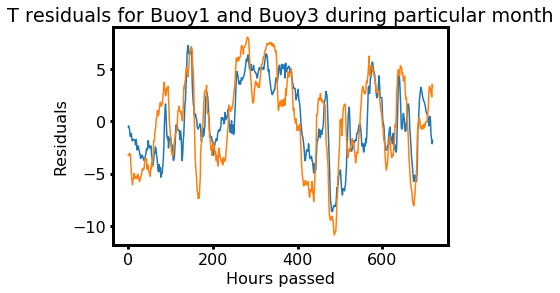

In [87]:
# month withitself 

# three years together with 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8766
rangehigh = rangelow + 720

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy1 and Buoy3 during particular month')

mymonth1 = g1[rangelow:rangehigh]
mymonth2 = g3[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()


mean -4.557152777777778 -3.4241666666666664
R =  0.8576646991543209
T, nullP 44.693028181121676 0.0


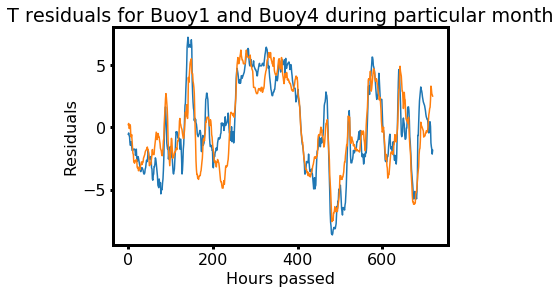

In [6]:
# month withitself 

# three years together with 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8766
rangehigh = rangelow + 720

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy1 and Buoy4 during particular month')

mymonth1 = g1[rangelow:rangehigh]
mymonth2 = g4[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()


mean -5.367499999999999 -5.541944444444444
R =  0.9699504970480218
T, nullP 106.82317679466532 0.0


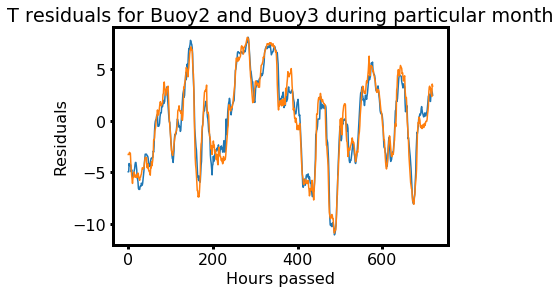

In [89]:
# month withitself 

# three years together with 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8766
rangehigh = rangelow + 720

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy2 and Buoy3 during particular month')

mymonth1 = g2[rangelow:rangehigh]
mymonth2 = g3[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()


mean -5.367499999999999 -3.4241666666666664
R =  0.8667735683438431
T, nullP 46.572211597980804 0.0


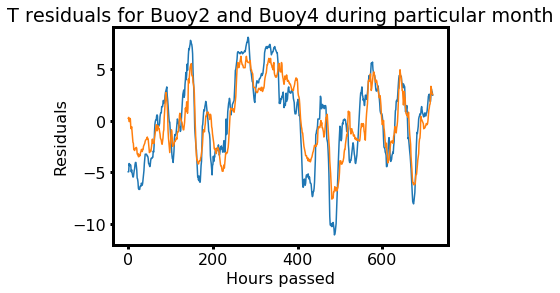

In [90]:
# month withitself 

# three years together with 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8766
rangehigh = rangelow + 720

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy2 and Buoy4 during particular month')

mymonth1 = g2[rangelow:rangehigh]
mymonth2 = g4[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()


In [1]:
# month withitself 

# three years together with 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8766
rangehigh = rangelow + 720

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy3 and Buoy4 during particular month')

mymonth1 = g3[rangelow:rangehigh]
mymonth2 = g4[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()


NameError: name 'myinterpolate' is not defined

mean -1.6262499999999998 -2.9575694444444443
R =  0.3364046894555304
T, nullP 9.572020360123465 0.0


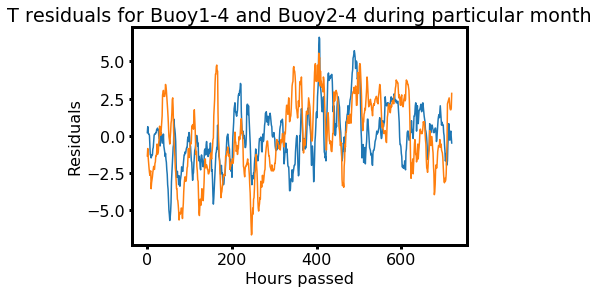

In [105]:
# month withitself 

# three years together with 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8500
rangehigh = rangelow + 720

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy1-4 and Buoy2-4 during particular month')

mymonth1 = g1[rangelow:rangehigh]-g4[rangelow:rangehigh]
mymonth2 = g2[rangelow:rangehigh]-g4[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()


mean -2.9575694444444443 -2.9556250000000004
R =  0.907379112253268
T, nullP 57.84662411727043 0.0


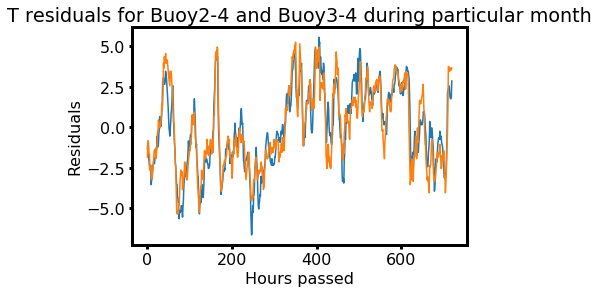

In [103]:
# month withitself 

# three years together with 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8500
rangehigh = rangelow + 720

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy2-4 and Buoy3-4 during particular month')

mymonth1 = g2[rangelow:rangehigh]-g4[rangelow:rangehigh]
mymonth2 = g3[rangelow:rangehigh]-g4[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()


mean -1.6262499999999998 -2.9556250000000004
R =  0.18704952645169778
T, nullP 5.102140002118767 2.1516651405040221e-07


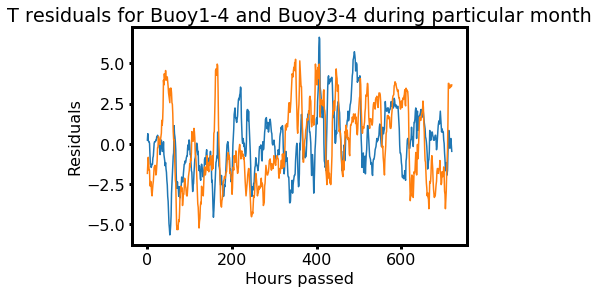

In [104]:
# month withitself 

# three years together with 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
#from myinterpolate import myinterpolate
# from mycorrelation import mycorrelation

pylab.rc('font', family='sans', size = 16)
pylab.rc('axes', linewidth = 3)
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.width'] = 3
plt.rcParams['figure.facecolor'] = 'white'


g1, g2, g3, g4  = np.loadtxt("LakeSuperiorAirTemperature.dat",unpack=True)

# make an array with hour, each next hour increments by one
hr = np.arange(0,g1.size,1)

# turn this function on when you are ready
# its in another file that you can modify

myinterpolate(g1)
myinterpolate(g2)
myinterpolate(g3)
myinterpolate(g4)

# this is a big data set
# you want to look at smaller portions of it

rangelow = 8500
rangehigh = rangelow + 720

# Geez, son of gosh, plot this already
#plt.plot(hr[rangelow:rangehigh],g1[rangelow:rangehigh],'-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g2[rangelow:rangehigh],'r-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g3[rangelow:rangehigh],'b-',lw=2)
#plt.plot(hr[rangelow:rangehigh],g4[rangelow:rangehigh],'m-',lw=2)

# if you don't make the labels look nice,
# people will think you are a novice
plt.title('T residuals for Buoy1-4 and Buoy3-4 during particular month')

mymonth1 = g1[rangelow:rangehigh]-g4[rangelow:rangehigh]
mymonth2 = g3[rangelow:rangehigh]-g4[rangelow:rangehigh]

# comment R to have a good graph 
R = mycorrelation(mymonth1,mymonth2)

plt.show()
